# Demo: Implicit SINDy example subtilis_competence

### created by Yi Chu, 12/05/18

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import scipy as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from pySINDy.sindypde import SINDyPDE
from pySINDy.isindy import ISINDy

##### generate our system

In [3]:
def subtilis_competence(t, S):
    _s_1 = S[0]

    a1 = 0.6

    v1 = a1 - (1.5 * _s_1) / (0.3 + _s_1)

    return [v1]

In [4]:
n = 1
dt = 0.1
tspan = np.arange(0, 5 + dt, dt)
len_t = len(tspan)

sss = 100
np.random.seed(12345)
Sinit = np.random.rand(n)
Sinit = np.random.rand(sss,n)
Sinit = np.concatenate((Sinit, 2*np.random.rand(sss,n)))
Sinit = np.concatenate((Sinit, 3*np.random.rand(sss,n)))
measure = len(Sinit)

tt = np.empty((len_t,measure))
x = np.empty((len_t,n,measure))
for ii in range(measure - 1):
    sol = integrate.solve_ivp(subtilis_competence, [0, len_t], Sinit[ii,:],
                                 t_eval=tspan, rtol = 1e-7, atol = 1e-7)
    tt[:,ii] = sol.t
    x[:,:,ii] = sol.y.T

xn = x
xt = np.empty((0,n))
dxt= np.empty(xt.shape)
t = np.empty((0,))
dxf = np.empty((len_t,n,measure))
for ll in range (measure):
    for ii in range(len_t):
        dxf[ii,:,ll] = subtilis_competence(t,xn[ii,:, ll])
    
    dxt = np.concatenate((dxt, dxf[:,:,ll]))
    xt = np.concatenate((xt, xn[:,:,ll]))
    t = np.concatenate((t, tt[:, ll]))

##### create isindy model

In [5]:
isindy_model = ISINDy(name = 'isindy')
data = isindy_model.fit(xt.T, 0.01, poly_degree=2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/findiff/findiff.py:242: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yd[ref_multi_slice] += w * y[off_multi_slice]


##### find and plot coefficients

In [6]:
isindy_model.coefficients()

array([[ 0.39219851],
       [-0.61828644],
       [ 0.        ],
       [ 0.43279567],
       [-0.52591673],
       [ 0.        ]])

In [7]:
isindy_model.descriptions()

['1', 'u0', 'u0^{2}', 'uk_{t}', 'u0uk_{t}', 'u0^{2}uk_{t}']

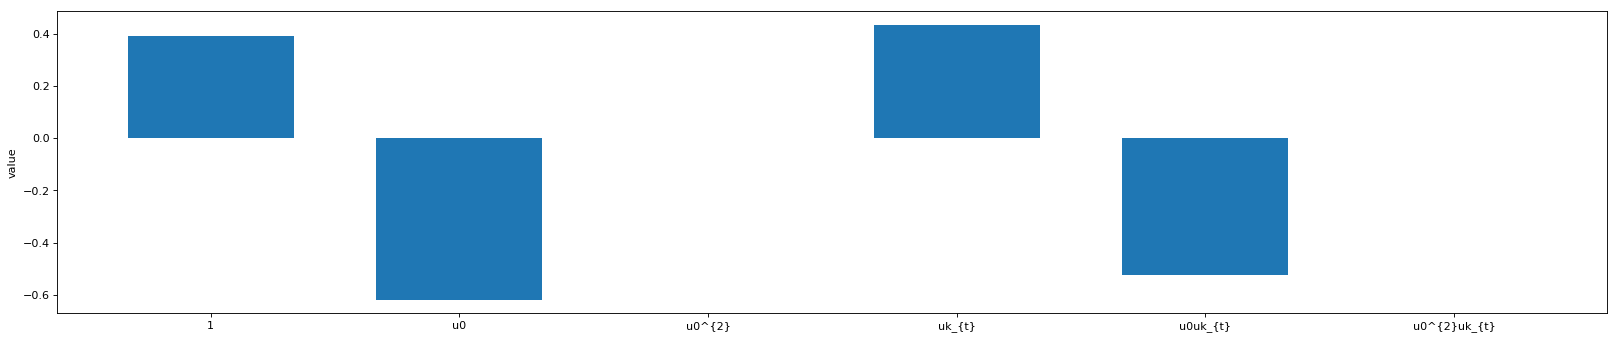

In [8]:
isindy_model.plot_coefficients()